# <font color=dark> Churn Prediction </font>

<hr style="border:2px solid gray">

## Importing Libraries and Dataset

In [81]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as stm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

In [82]:
# Importing Dataset

df_s = pd.read_csv('file1.csv')
df_s.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4343,7130-VTEWQ,Female,1,No,No,8,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,606.25,Yes
1,6620,6457-USBER,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.80,80.8,Yes
2,901,9734-YWGEX,Female,0,No,No,9,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),98.30,923.5,Yes
3,5365,0847-HGRML,Male,0,No,Yes,62,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.00,1250.1,No
4,5460,6551-VLJMV,Male,0,Yes,No,34,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.05,679,No


In [83]:
# Removing first two columns as they are redundant for prediction model

df = df_s.iloc[:,2:]
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,No,No,8,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,606.25,Yes
1,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.80,80.8,Yes
2,Female,0,No,No,9,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),98.30,923.5,Yes
3,Male,0,No,Yes,62,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.00,1250.1,No
4,Male,0,Yes,No,34,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.05,679,No


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5001 non-null   object 
 1   SeniorCitizen     5001 non-null   int64  
 2   Partner           5001 non-null   object 
 3   Dependents        5001 non-null   object 
 4   tenure            5001 non-null   int64  
 5   PhoneService      5001 non-null   object 
 6   MultipleLines     5001 non-null   object 
 7   InternetService   5001 non-null   object 
 8   OnlineSecurity    5001 non-null   object 
 9   OnlineBackup      5001 non-null   object 
 10  DeviceProtection  5001 non-null   object 
 11  TechSupport       5001 non-null   object 
 12  StreamingTV       5001 non-null   object 
 13  StreamingMovies   5001 non-null   object 
 14  Contract          5001 non-null   object 
 15  PaperlessBilling  5001 non-null   object 
 16  PaymentMethod     5001 non-null   object 


In [85]:
# We see that Total Charges column type is not numeric, converting it to numeric form

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5001 non-null   object 
 1   SeniorCitizen     5001 non-null   int64  
 2   Partner           5001 non-null   object 
 3   Dependents        5001 non-null   object 
 4   tenure            5001 non-null   int64  
 5   PhoneService      5001 non-null   object 
 6   MultipleLines     5001 non-null   object 
 7   InternetService   5001 non-null   object 
 8   OnlineSecurity    5001 non-null   object 
 9   OnlineBackup      5001 non-null   object 
 10  DeviceProtection  5001 non-null   object 
 11  TechSupport       5001 non-null   object 
 12  StreamingTV       5001 non-null   object 
 13  StreamingMovies   5001 non-null   object 
 14  Contract          5001 non-null   object 
 15  PaperlessBilling  5001 non-null   object 
 16  PaymentMethod     5001 non-null   object 


<hr style="border:2px solid gray">

## Exploratory Data Analysis

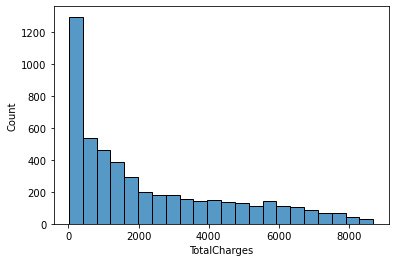

In [86]:
# As we see above Total Charges has missing values, let us explore further

# Plotting Histogram for Total Values

sns.histplot(df.TotalCharges)
plt.show ()

In [87]:
# As we can see the data set is skewed to right, we replace the missing values by median.

df.TotalCharges.median()

1388.975

In [88]:
# Replacing missing value with median

df = df.fillna(df.median())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5001 non-null   object 
 1   SeniorCitizen     5001 non-null   int64  
 2   Partner           5001 non-null   object 
 3   Dependents        5001 non-null   object 
 4   tenure            5001 non-null   int64  
 5   PhoneService      5001 non-null   object 
 6   MultipleLines     5001 non-null   object 
 7   InternetService   5001 non-null   object 
 8   OnlineSecurity    5001 non-null   object 
 9   OnlineBackup      5001 non-null   object 
 10  DeviceProtection  5001 non-null   object 
 11  TechSupport       5001 non-null   object 
 12  StreamingTV       5001 non-null   object 
 13  StreamingMovies   5001 non-null   object 
 14  Contract          5001 non-null   object 
 15  PaperlessBilling  5001 non-null   object 
 16  PaymentMethod     5001 non-null   object 


In [89]:
# Changing the datatype of 'tenure' to float

df['tenure'] = df['tenure'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5001 non-null   object 
 1   SeniorCitizen     5001 non-null   int64  
 2   Partner           5001 non-null   object 
 3   Dependents        5001 non-null   object 
 4   tenure            5001 non-null   float64
 5   PhoneService      5001 non-null   object 
 6   MultipleLines     5001 non-null   object 
 7   InternetService   5001 non-null   object 
 8   OnlineSecurity    5001 non-null   object 
 9   OnlineBackup      5001 non-null   object 
 10  DeviceProtection  5001 non-null   object 
 11  TechSupport       5001 non-null   object 
 12  StreamingTV       5001 non-null   object 
 13  StreamingMovies   5001 non-null   object 
 14  Contract          5001 non-null   object 
 15  PaperlessBilling  5001 non-null   object 
 16  PaymentMethod     5001 non-null   object 


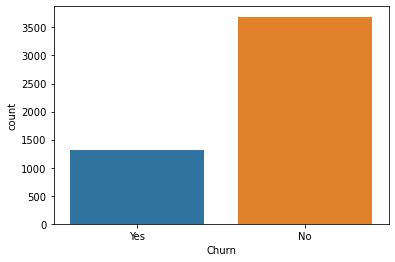

In [90]:
# Checking the count of Churn Variable

sns.countplot(df.Churn, )
plt.show ()

#### Exploring Churn with Numerical Variables

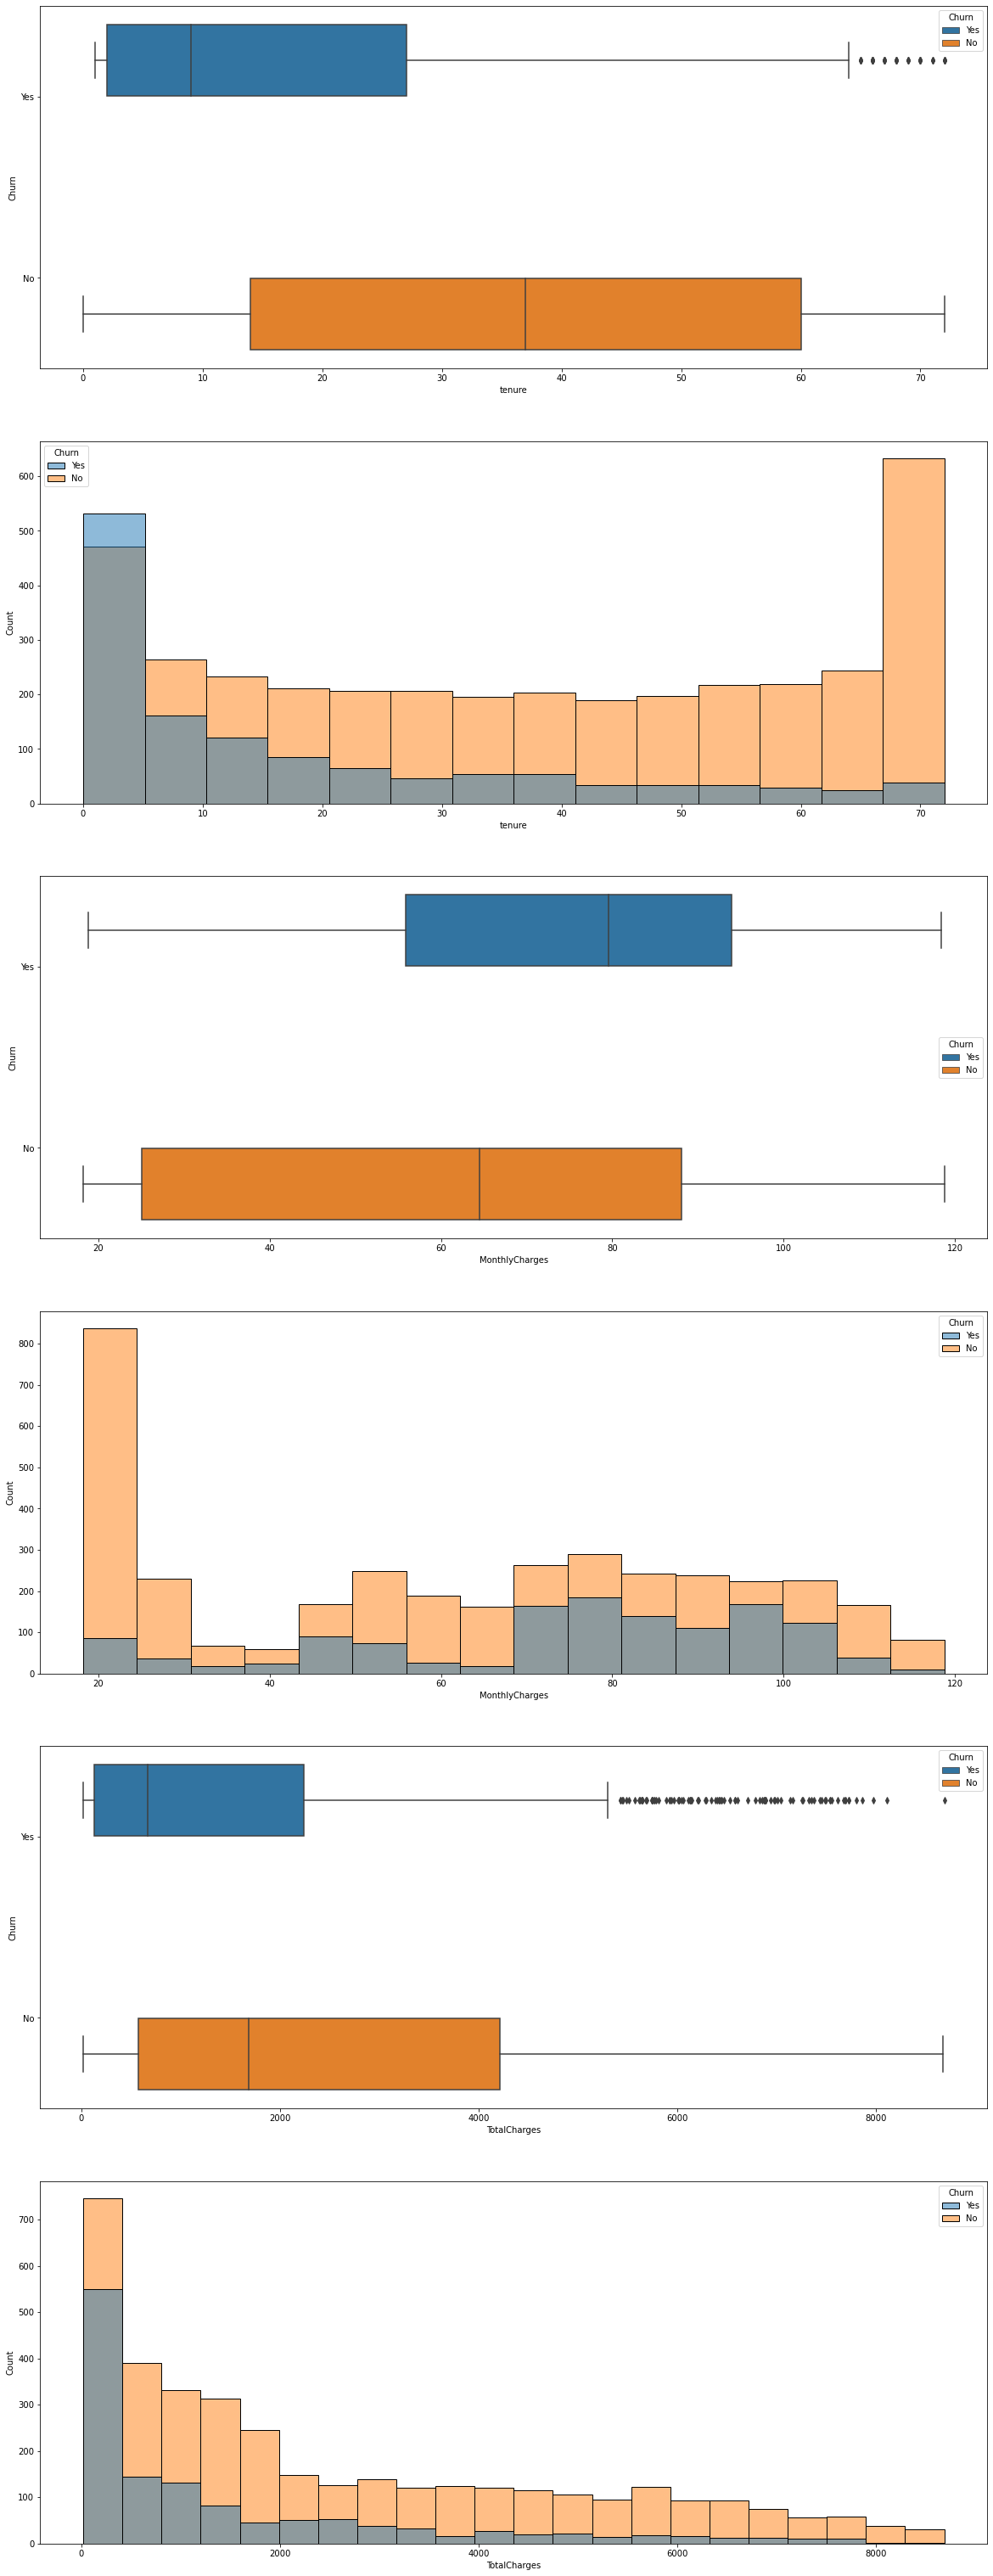

In [91]:
fig, ax = plt.subplots(6, figsize=(20, 55))

g=sns.boxplot(data=df, x="tenure", y="Churn", ax=ax[0], hue="Churn")
g=sns.histplot(data=df, x="tenure", ax=ax[1], hue="Churn")


g=sns.boxplot(data=df, x="MonthlyCharges", y="Churn", ax=ax[2], hue="Churn")
g=sns.histplot(data=df, x="MonthlyCharges", ax=ax[3], hue="Churn")


g=sns.boxplot(data=df, x="TotalCharges", y="Churn", ax=ax[4], hue="Churn")
g=sns.histplot(data=df, x="TotalCharges", ax=ax[5], hue="Churn")

<hr style="border:2px solid gray">

### Encoding binary labels

In [92]:
def label_encode(features, df):
    for i in features:
        df[i] = df[i].map({'Yes': 1, 'No': 0})
    return       

label_encode(['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], df)

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

### Encoding categorical labels using OHE

In [93]:
cat_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=cat_features)

<hr style="border:2px solid gray">

## Building a prediction model for predicting churn, using both discriminant analysis and logistic regression.

# 

## Linear Discriminant Analysis

In [94]:
X = df.drop("Churn", axis=1)
y = df.Churn
X.shape, y.shape

((5001, 40), (5001,))

In [95]:
# Oversampling the data as the Churn data is unbalanced

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_res.shape, y_res.shape

((7382, 40), (7382,))

In [96]:
lda = LinearDiscriminantAnalysis(n_components=1)

#Fit the LDA model
model_lda = lda.fit(X_res, y_res)

In [97]:
model_lda.coef_

array([[-1.98460008e-01,  8.34847912e-02, -2.64024805e-01,
        -4.90565511e-01, -4.12262836e-02, -9.34702599e-01,
         1.58639232e-01,  4.60959933e-02,  8.29946456e-05,
        -5.00636931e-01, -3.01077422e-01, -6.34820876e-01,
         1.21221156e-02, -7.84548959e-02, -3.99963955e-01,
        -5.91217901e-01, -3.99963955e-01, -1.81866177e+00,
        -6.19029968e-01, -3.99963955e-01, -1.18854772e+00,
        -4.11401944e-01, -3.99963955e-01, -6.30057549e-01,
        -4.14392393e-01, -3.99963955e-01, -1.45877240e+00,
        -2.18486893e-01, -3.99963955e-01, -5.86192286e-01,
        -2.67866372e-01, -3.99963955e-01, -6.85727994e-01,
        -1.28838788e+00, -2.62109060e+00, -2.11105097e+00,
        -2.56521544e+00, -2.64453974e+00, -1.42656974e+00,
        -2.52385276e+00]])

In [98]:
model_lda.intercept_

array([5.95807043])

In [99]:
df1=pd.DataFrame(model_lda.coef_[0].reshape(-1,1),X.columns,columns=["LD1"])
df2=pd.DataFrame(model_lda.intercept_[0].reshape(-1,1),["Bias"],columns=["LD1"])
df_lda = pd.concat([df2, df1], axis=0)
print ('Coefficients of LDA')
df_lda

Coefficients of LDA


,LD1
Bias,5.958070
gender,-0.198460
SeniorCitizen,0.083485
Partner,-0.264025
Dependents,-0.490566
tenure,-0.041226
PhoneService,-0.934703
PaperlessBilling,0.158639
MonthlyCharges,0.046096
TotalCharges,0.000083


In [100]:
df_g = pd.DataFrame(model_lda.means_.T,X_res.columns,columns=["Churn_0","Churn_1"])
print ('Group Means for each class:')
df_g

Group Means for each class:


,Churn_0,Churn_1
gender,0.515849,0.354376
SeniorCitizen,0.126795,0.134923
Partner,0.527770,0.225142
Dependents,0.346519,0.086156
tenure,37.332972,17.401183
PhoneService,0.898943,0.892712
PaperlessBilling,0.528312,0.638038
MonthlyCharges,61.306204,74.740053
TotalCharges,2544.075935,1501.069484
MultipleLines_No,0.488486,0.354646


### Accuracy for LDA model

In [101]:
y_pred_lda = model_lda.predict(X_res)
y_pred_lda

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [102]:
from sklearn.metrics import accuracy_score
y_pred  = pd.DataFrame({"actual":y_res,
                       "predicted":y_pred_lda})

print('Accuracy of LDA model: {:.2f}'.format(accuracy_score(y_pred.actual, y_pred.predicted)))

Accuracy of LDA model: 0.85


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3691
           1       0.85      0.85      0.85      3691

    accuracy                           0.85      7382
   macro avg       0.85      0.85      0.85      7382
weighted avg       0.85      0.85      0.85      7382



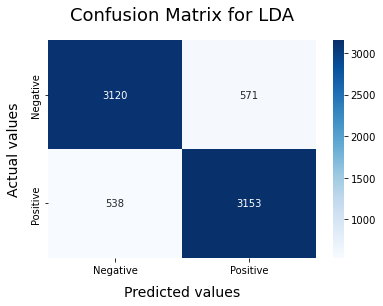

In [103]:
# Print the evaluation metrics for the dataset.
print(classification_report(y_res, y_pred_lda))

# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_res, y_pred_lda)
categories = ['Negative','Positive']
sns.heatmap(cf_matrix, annot =True, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix for LDA", fontdict = {'size':18}, pad = 20)
plt.show()

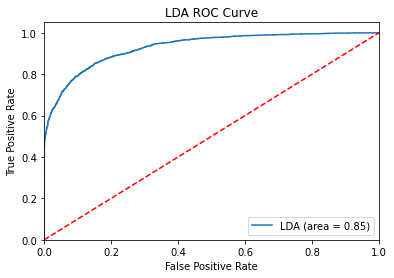

In [104]:
# Plotting the ROC Curve

logit_roc_auc = roc_auc_score(y_res, model_lda.predict(X_res))
fpr, tpr, thresholds = roc_curve(y_res, model_lda.predict_proba(X_res)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LDA (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [105]:
# Fit Logistic Regression model

log_reg = stm.Logit(y_res, X_res).fit()
print(log_reg.summary())

         Current function value: 0.312331
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7382
Model:                          Logit   Df Residuals:                     7348
Method:                           MLE   Df Model:                           33
Date:                Sun, 13 Nov 2022   Pseudo R-squ.:                  0.5494
Time:                        20:07:54   Log-Likelihood:                -2305.6
converged:                      False   LL-Null:                       -5116.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
gender                                     -0.1344      0.073     -1.834      0.067   

In [106]:
log_reg.pvalues
a = pd.DataFrame(log_reg.pvalues,columns=['p-value'])
a = a.reset_index()
a.columns = ['Explanatory_variables','p-value']
a.loc[a['p-value']>=0.05,'Sig/Non_Sig']='Not Significant'
a.loc[a['p-value']<0.05,'Sig/Non_Sig']='Significant'
a

,Explanatory_variables,p-value,Sig/Non_Sig
0,gender,6.664288e-02,Not Significant
1,SeniorCitizen,2.742402e-01,Not Significant
2,Partner,2.387905e-01,Not Significant
3,Dependents,1.147378e-03,Significant
4,tenure,3.985990e-28,Significant
5,PhoneService,9.952816e-01,Not Significant
6,PaperlessBilling,4.423026e-04,Significant
7,MonthlyCharges,1.656343e-42,Significant
8,TotalCharges,1.459644e-11,Significant
9,MultipleLines_No,9.945385e-01,Not Significant


In [107]:
a.nsmallest(10, ['p-value'])

,Explanatory_variables,p-value,Sig/Non_Sig
7,MonthlyCharges,1.656343e-42,Significant
4,tenure,3.985990e-28,Significant
37,PaymentMethod_Credit card (automatic),6.034127e-17,Significant
36,PaymentMethod_Bank transfer (automatic),2.548761e-16,Significant
39,PaymentMethod_Mailed check,4.174654e-16,Significant
38,PaymentMethod_Electronic check,3.770048e-13,Significant
8,TotalCharges,1.459644e-11,Significant
29,StreamingTV_Yes,1.428099e-07,Significant
17,OnlineSecurity_Yes,2.526858e-07,Significant
20,OnlineBackup_Yes,2.040022e-06,Significant


### Accuracy for Logistic Regression model

In [108]:
yhat = log_reg.predict(X_res)
y_pred_lr = list(map(round, yhat))

In [109]:
y_pred1  = pd.DataFrame({"actual":y_res,
                       "predicted":y_pred_lr})

print('Accuracy of Logistic Regression model: {:.2f}'.format(accuracy_score(y_pred1.actual, y_pred1.predicted)))

Accuracy of Logistic Regression model: 0.85


              precision    recall  f1-score   support

           0       0.84      0.87      0.85      3691
           1       0.86      0.84      0.85      3691

    accuracy                           0.85      7382
   macro avg       0.85      0.85      0.85      7382
weighted avg       0.85      0.85      0.85      7382



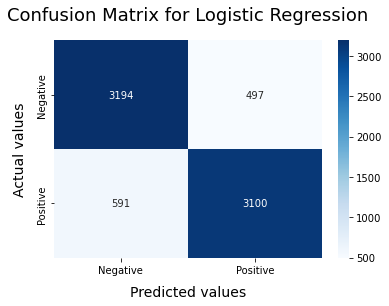

In [110]:
# Print the evaluation metrics for the dataset.
print(classification_report(y_res, y_pred_lr))

# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_res, y_pred_lr)
categories = ['Negative','Positive']
sns.heatmap(cf_matrix, annot = True, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix for Logistic Regression", fontdict = {'size':18}, pad = 20)
plt.show()

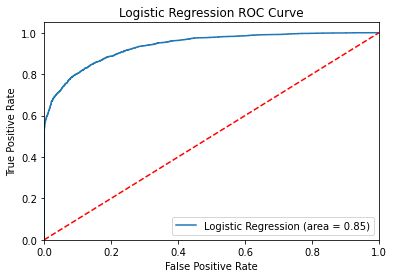

In [111]:
# Plotting the ROC Curve

logit_roc_auc = roc_auc_score(y_res, y_pred_lr)
fpr, tpr, thresholds = roc_curve(y_res, yhat)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

<hr style="border:2px solid gray">

## Dividing all the customers into 3 categories namely Low, Medium and High using the variable “TotalCharges” and building prediction models to predict the category/ Value Segment. 

In [112]:
# Dividing into 3 groups based on Total Charges

thirds = [.33,.66]
customer_value_seg_thirds = df.TotalCharges.quantile(q=thirds).tolist()
customer_value_seg_thirds = [df.TotalCharges.min()] + customer_value_seg_thirds  + [df.TotalCharges.max()]

df['customer_value_segment'] = pd.cut(df.TotalCharges, bins=customer_value_seg_thirds, 
                                    labels=['Low', 'Medium', 'High'])

df[['TotalCharges', 'customer_value_segment']].head(10)

,TotalCharges,customer_value_segment
0,606.25,Low
1,80.80,Low
2,923.50,Medium
3,1250.10,Medium
4,679.00,Medium
5,507.90,Low
6,3097.20,High
7,4820.55,High
8,4451.85,High
9,5459.20,High


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   gender                                   5001 non-null   int64   
 1   SeniorCitizen                            5001 non-null   int64   
 2   Partner                                  5001 non-null   int64   
 3   Dependents                               5001 non-null   int64   
 4   tenure                                   5001 non-null   float64 
 5   PhoneService                             5001 non-null   int64   
 6   PaperlessBilling                         5001 non-null   int64   
 7   MonthlyCharges                           5001 non-null   float64 
 8   TotalCharges                             5001 non-null   float64 
 9   Churn                                    5001 non-null   int64   
 10  MultipleLines_No                    

In [114]:
# As we see there is one null value in customer value segment column 

# Displaying details for null value in customer value segment column 
df_na = df[df['customer_value_segment'].isna()]
df_na

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_value_segment
4128,1,0,1,1,1.0,1,0,18.8,18.8,0,...,1,0,0,1,0,0,0,0,1,NaN


In [115]:
# Replacing the above missing Value with 'Low'

df['customer_value_segment'] = df['customer_value_segment'].fillna('Low')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   gender                                   5001 non-null   int64   
 1   SeniorCitizen                            5001 non-null   int64   
 2   Partner                                  5001 non-null   int64   
 3   Dependents                               5001 non-null   int64   
 4   tenure                                   5001 non-null   float64 
 5   PhoneService                             5001 non-null   int64   
 6   PaperlessBilling                         5001 non-null   int64   
 7   MonthlyCharges                           5001 non-null   float64 
 8   TotalCharges                             5001 non-null   float64 
 9   Churn                                    5001 non-null   int64   
 10  MultipleLines_No                    

### Fitting Multiclass LDA model

In [116]:
# Defining predictor and explanatory variables

X1 = df.drop("customer_value_segment", axis=1)
y1 = df.customer_value_segment
X1.shape, y1.shape

((5001, 41), (5001,))

In [117]:
lda1 = LinearDiscriminantAnalysis(n_components=2)

#Fit the LDA model
multi_lda = lda1.fit(X1, y1)

In [118]:
multi_lda.coef_

array([[ 9.26362679e-03,  2.38757316e-01, -2.35108598e-01,
         2.68238098e-01,  1.62419005e-01,  3.46667078e-01,
        -3.35649260e-02,  3.07827750e-02,  1.67918459e-03,
        -3.25144301e-01, -5.62311624e-03, -3.46667078e-01,
         1.60434979e-01,  3.72735661e-01, -2.10183189e-01,
        -2.61238094e-01,  3.57057099e-02, -2.61238094e-01,
         1.64650105e-01,  5.84972649e-02, -2.61238094e-01,
         1.32472354e-01, -8.72909433e-02, -2.61238094e-01,
         3.42399083e-01, -1.82494947e-02, -2.61238094e-01,
         2.41306428e-01, -7.82510812e-02, -2.61238094e-01,
         3.06167367e-01, -3.88381645e-02, -2.61238094e-01,
         2.56227250e-01,  6.74468803e-01,  6.16774365e-01,
        -1.45256538e+00, -7.31817864e-02, -5.00733902e-02,
        -3.93937074e-02,  1.79947929e-01],
       [-8.20655953e-03, -1.44073634e-01,  1.16828573e-01,
        -2.86115920e-01, -2.43588609e-01, -2.18556079e-01,
         8.59327064e-02, -7.00428625e-02, -5.66849069e-05,
         5.90

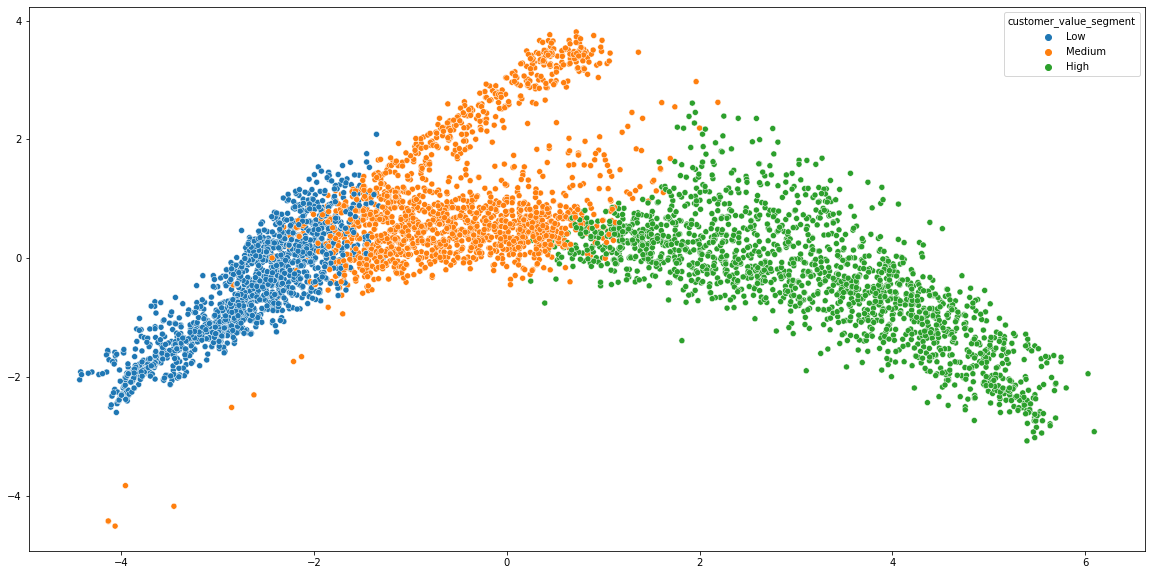

In [119]:
multi_lda_data = lda1.fit_transform(X1,y1)

# Scatter plot based on multiclass LDA model
plt.figure(figsize=(20,10))
sns.scatterplot(x = multi_lda_data[:, 0], y = multi_lda_data[:, 1], hue = df.customer_value_segment, data=df)
plt.show()

In [120]:
df_multi = pd.DataFrame(multi_lda.means_.T,X1.columns,columns=["Means_High","Means_Low","Means_Medium"])

In [121]:
print ('Group Means for each class:')
df_multi

Group Means for each class:


,Means_High,Means_Low,Means_Medium
gender,0.517952,0.503331,0.508783
SeniorCitizen,0.211889,0.127196,0.141127
Partner,0.666863,0.281042,0.497274
Dependents,0.331960,0.242277,0.331314
tenure,56.640377,6.701393,32.397941
PhoneService,0.933490,0.890975,0.881284
PaperlessBilling,0.691583,0.519685,0.541490
MonthlyCharges,89.048529,47.087341,57.235433
TotalCharges,5037.431636,235.639158,1454.911402
Churn,0.158917,0.391884,0.238038


### Accuracy for Multiclass LDA model

In [122]:
y_pred_multi = multi_lda.predict(X1)
y_pred_multi

array(['Low', 'Low', 'Medium', ..., 'Medium', 'Medium', 'Low'],
      dtype='<U6')

In [123]:
y_pred2  = pd.DataFrame({"actual":y1,
                       "predicted":y_pred_multi})

print('Accuracy of Multiclass LDA model: {:.2f}'.format(accuracy_score(y_pred2.actual, y_pred2.predicted)))

Accuracy of Multiclass LDA model: 0.91


              precision    recall  f1-score   support

        High       1.00      0.89      0.94      1699
         Low       0.92      0.92      0.92      1651
      Medium       0.82      0.92      0.87      1651

    accuracy                           0.91      5001
   macro avg       0.91      0.91      0.91      5001
weighted avg       0.91      0.91      0.91      5001



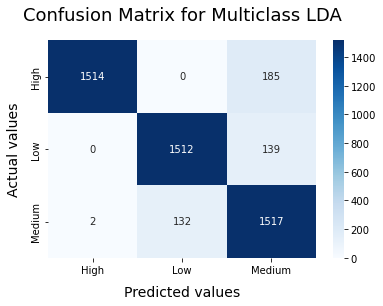

In [124]:
# Print the evaluation metrics for the dataset.
print(classification_report(y1, y_pred_multi))

# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y1, y_pred_multi)
cm_df = pd.DataFrame(cf_matrix,
                     index = ['High','Low','Medium'], 
                     columns = ['High','Low','Medium'])
sns.heatmap(cm_df, annot = True, cmap = 'Blues',fmt = '')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix for Multiclass LDA", fontdict = {'size':18}, pad = 20)
plt.show()